# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [3]:
!pip install -q "dask[distributed]" --upgrade 
!pip install -q dask[dataframe]
!pip install -q scipy

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [2]:
from dask.distributed import Client
client = Client()

/home/jovyan/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42337 instead
  warnings.warn(


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [3]:
col_defintions = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df = dd.read_csv('EDA_iris.txt', names = col_defintions, header=None)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [4]:
df = df.set_index('Species')

## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [5]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, Sepal Length to Petal Width
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [6]:
desc = df.describe()
desc.compute()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [7]:
# df_sliced = df[10:20]
df_sliced = df.loc['Iris-setosa':'Iris-setosa']

# Compute the result to get the actual data
df_sliced_c = df_sliced.compute()
df_sliced_c

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
Iris-setosa,5.4,3.9,1.7,0.4
Iris-setosa,4.6,3.4,1.4,0.3
Iris-setosa,5.0,3.4,1.5,0.2
Iris-setosa,4.4,2.9,1.4,0.2


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [8]:
mean = df.mean().compute()

# Compute variance
variance = df.var().compute()

# Compute quartiles (25%, 50%, 75%)
quartiles = df.quantile([0.25, 0.5, 0.75]).compute()

print ('Mean: ')
print (f'{mean}')
print ('Variance')
print (f'{variance}')
print ('Quartiles')
print (f'{quartiles}')

Mean: 
Sepal Length    5.843333
Sepal Width     3.054000
Petal Length    3.758667
Petal Width     1.198667
dtype: float64
Variance
Sepal Length    0.685694
Sepal Width     0.188004
Petal Length    3.113179
Petal Width     0.582414
dtype: float64
Quartiles
      Sepal Length  Sepal Width  Petal Length  Petal Width
0.25           5.1          2.8          1.60          0.3
0.50           5.8          3.0          4.35          1.3
0.75           6.4          3.3          5.10          1.8


## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

In [9]:
import numpy as np

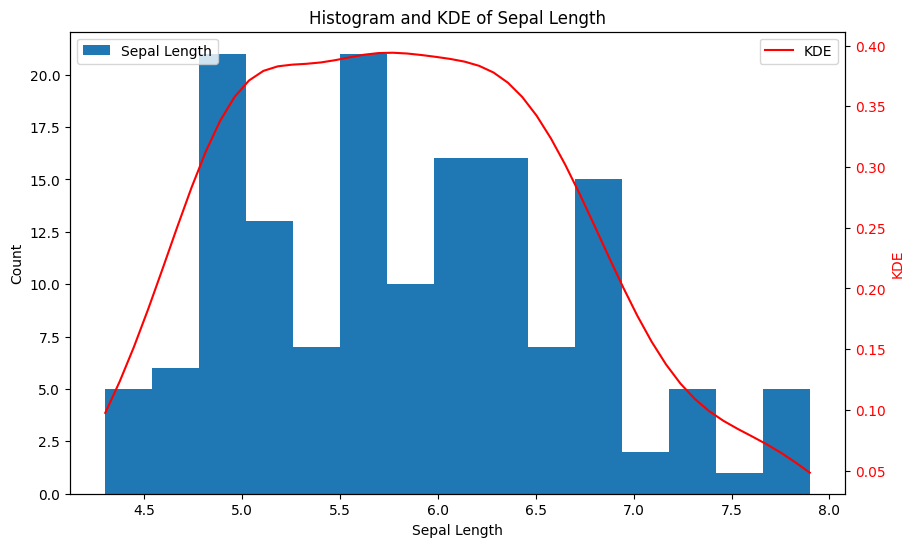

In [10]:
sepal_len = df['Sepal Length'].compute()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram
hist_values, bin_edges, _ = ax1.hist(sepal_len, bins=15, label='Sepal Length')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Count')

# Create the second y-axis for the KDE on the same plot
ax2 = ax1.twinx()

# Compute and plot KDE using scipy's gaussian_kde function
kde = gaussian_kde(sepal_len)
x_vals = np.linspace(sepal_len.min(), sepal_len.max())
ax2.plot(x_vals, kde(x_vals), color='red', label='KDE')

# Set y-axis label and color for the KDE
ax2.set_ylabel('KDE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Histogram and KDE of Sepal Length')

plt.show()

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

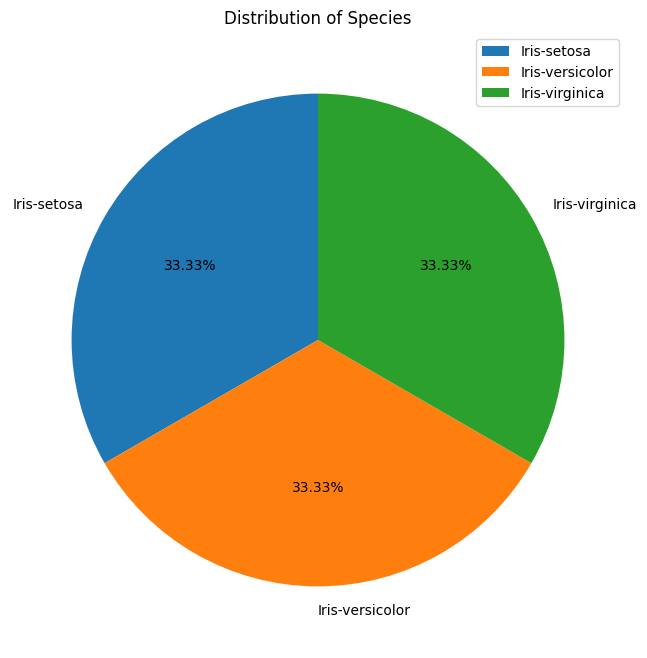

In [11]:
value_counts = df.index.value_counts().compute()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, autopct = '%1.2f%%', startangle =90)

plt.legend()
plt.title('Distribution of Species')
plt.show()

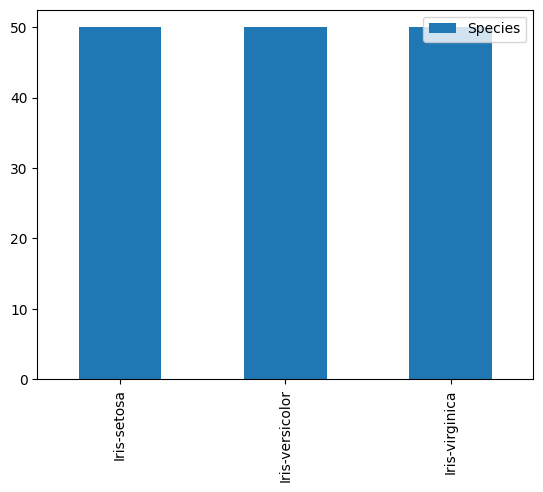

In [12]:
value_counts.plot(kind='bar')
plt.legend()
plt.show()

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [13]:
# ----- Compute Covariance -----
covariance = df.cov().compute()
print("Covariance between columns:")
print(covariance)

# ----- Compute Correlation -----
correlation = df.corr().compute()
print("\nCorrelation between columns:")
print(correlation)

Covariance between columns:
              Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      0.685694    -0.039268      1.273682     0.516904
Sepal Width      -0.039268     0.188004     -0.321713    -0.117981
Petal Length      1.273682    -0.321713      3.113179     1.296387
Petal Width       0.516904    -0.117981      1.296387     0.582414

Correlation between columns:
              Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      1.000000    -0.109369      0.871754     0.817954
Sepal Width      -0.109369     1.000000     -0.420516    -0.356544
Petal Length      0.871754    -0.420516      1.000000     0.962757
Petal Width       0.817954    -0.356544      0.962757     1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

<Axes: >

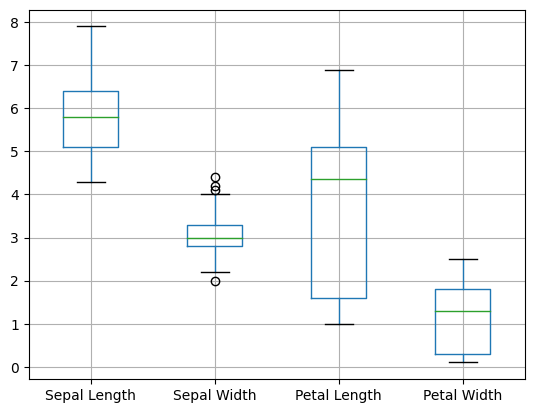

In [14]:
df.compute().boxplot()

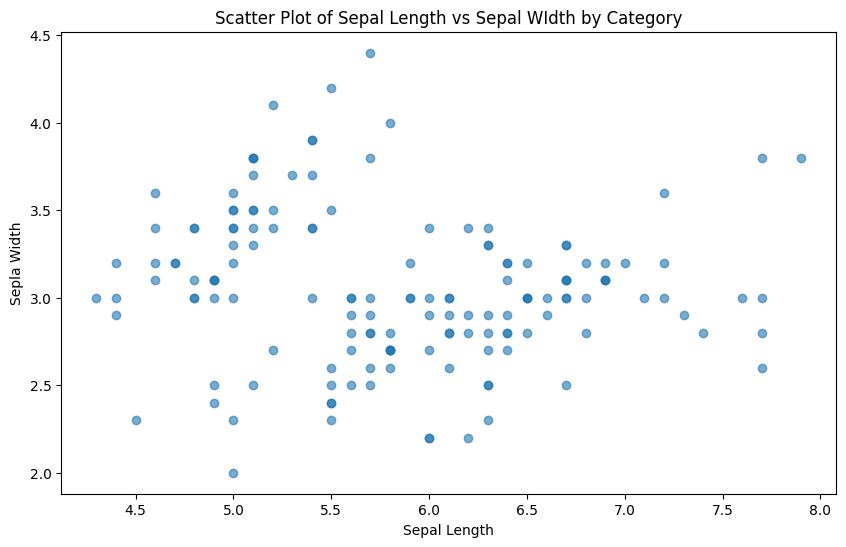

In [15]:
# Since no columns are spified, I created a plot for sepal lenght vs sepal width
df_sc = df.compute()

df_sc.head()
plt.figure(figsize=(10, 6))

plt.scatter(df_sc['Sepal Length'], df_sc['Sepal Width'], alpha=0.6)

plt.title('Scatter Plot of Sepal Length vs Sepal WIdth by Category')
plt.xlabel('Sepal Length')
plt.ylabel('Sepla Width')
plt.show()

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

Text(0.5, 0.5, 'Sepla Width')

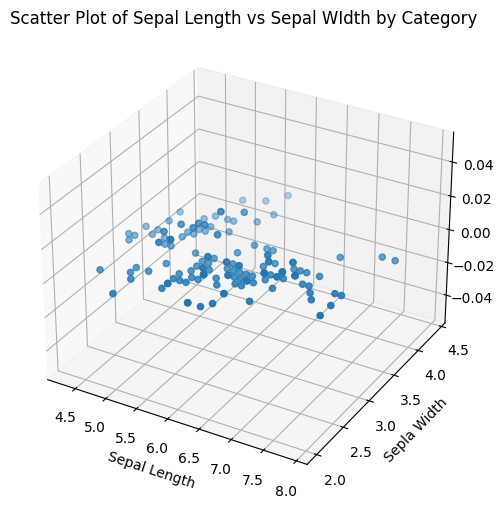

In [16]:
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# I dont give the 3rd dimension here, it is set to zero
ax.scatter(df_sc['Sepal Length'], df_sc['Sepal Width'], zs = 0)
plt.title('Scatter Plot of Sepal Length vs Sepal WIdth by Category')
plt.xlabel('Sepal Length')
plt.ylabel('Sepla Width')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Sepal Width')

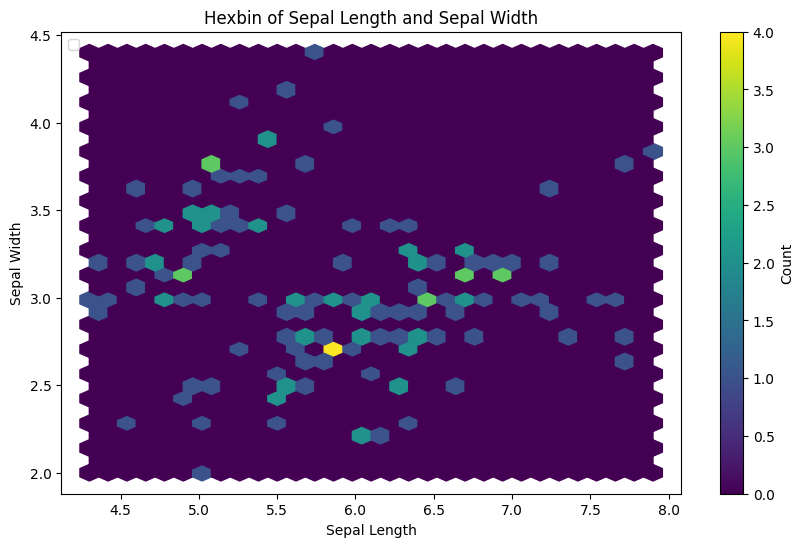

In [17]:
plt.figure(figsize=(10, 6))

# Use the hexbin function to create a hexbin plot
plt.hexbin(df_sc['Sepal Length'], df_sc['Sepal Width'], gridsize=30)

# Add a color bar to indicate density
plt.colorbar(label='Count')
plt.legend()
# Add titles and labels
plt.title('Hexbin of Sepal Length and Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [18]:
client.close()